In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

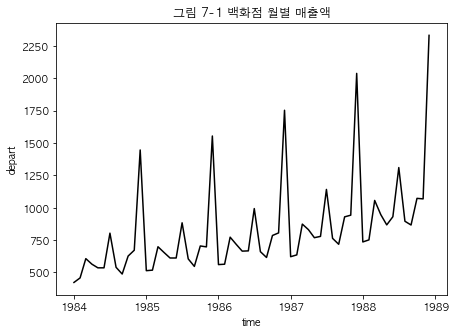

In [4]:
# Example 7-1
z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1984", periods=len(z), freq="MS")
data = pd.Series(z, index)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black')
ax.set_xlabel("time")
ax.set_ylabel("depart")
ax.set_title("그림 7-1 백화점 월별 매출액")
plt.show()

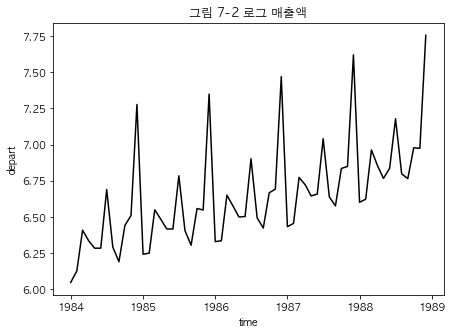

In [5]:
ldep = np.log(data)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(ldep, 'black')
ax.set_xlabel("time")
ax.set_ylabel("depart")
ax.set_title("그림 7-2 로그 매출액")
plt.show()

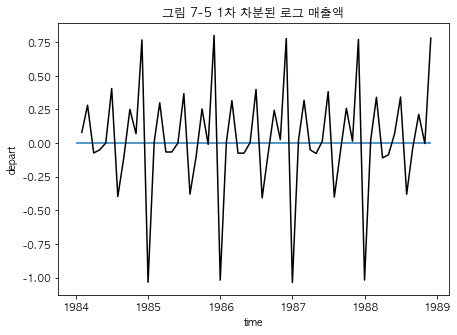

In [9]:
dif_1 = ldep.diff(periods=1)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(dif_1, 'black')
ax.hlines(0, dif_1.index.min(), dif_1.index.max())
ax.set_xlabel("time")
ax.set_ylabel("depart")
ax.set_title("그림 7-5 1차 차분된 로그 매출액")
plt.show()

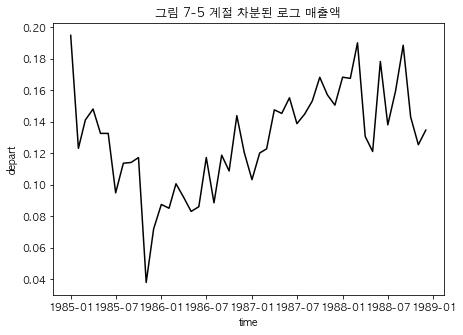

In [11]:
dif_12 = ldep.diff(periods=12)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(dif_12, 'black')
ax.set_xlabel("time")
ax.set_ylabel("depart")
ax.set_title("그림 7-5 계절 차분된 로그 매출액")
plt.show()

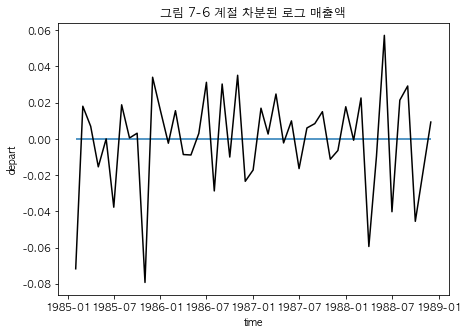

In [15]:
dif_112 = dif_1.diff(periods=12)
dif_112 = dif_112.dropna()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(dif_112, 'black')
ax.hlines(0, dif_112.index.min(), dif_112.index.max())
ax.set_xlabel("time")
ax.set_ylabel("depart")
ax.set_title("그림 7-6 계절 차분된 로그 매출액")
plt.show()

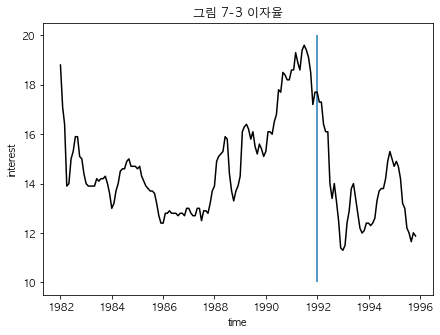

In [19]:
# Example 7-3
z = []

with open('../data/interest.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1982", periods=len(z), freq="MS")
data = pd.Series(z, index)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black')
ax.vlines(pd.to_datetime("1992-01-01"), 10, 20)
ax.set_xlabel("time")
ax.set_ylabel("interest")
ax.set_title("그림 7-3 이자율")
plt.show()

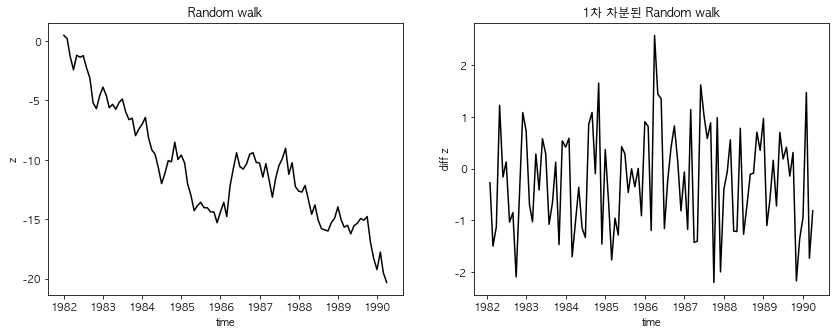

In [30]:
# Figure 7-4

np.random.seed(123456)

z = np.cumsum(np.random.normal(0.01, 1, (100)))

index = pd.date_range(start="1982", periods=len(z), freq="MS")
data = pd.Series(z, index)
              
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(data, 'black')
ax1.set_title("Random walk")
ax1.set_xlabel("time")
ax1.set_ylabel("z")

ax2.plot(data.diff(1), 'black')
ax2.set_title("1차 차분된 Random walk")
ax2.set_xlabel("time")
ax2.set_ylabel("diff z")

plt.show()

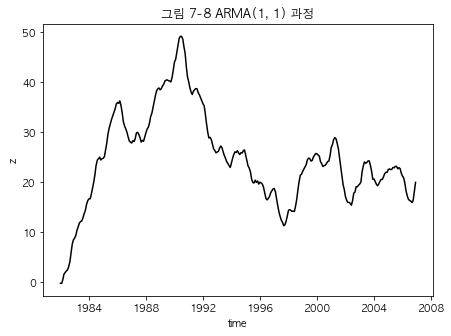

In [36]:
# Figure 7-7 ~ 7-10
np.random.seed(123456)

z = np.zeros(302)
a1 = np.random.normal()

for i in range(300):
    a = np.random.normal()
    z[i+2] = 1.8 * z[i+1] - 0.8 * z[i] - 0.5 * a1
    a1 = a
    
z = z[2:]

index = pd.date_range(start="1982", periods=len(z), freq="MS")
data = pd.Series(z, index)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black')
ax.set_xlabel("time")
ax.set_ylabel("z")
ax.set_title("그림 7-8 ARMA(1, 1) 과정")
plt.show()